In [310]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Synthetic Data

In [542]:
np.random.seed(42)
X = np.random.uniform(-10, 10, 100)
y = 2*X**2 + 5*X + 7 + np.random.normal(0, 1, 100)

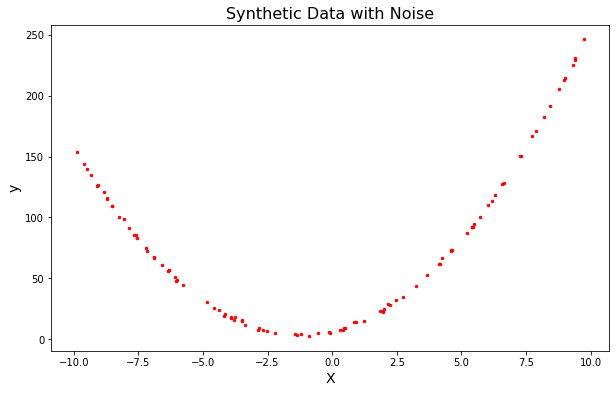

In [543]:
plt.figure(figsize=(10,6))
plt.title('Synthetic Data with Noise', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.scatter(X, y, s=6, color='red')
plt.show()

# Initialising the Hyperparameters

We want to determine a model with the equation $ax^2 + bx + c$ for the data above so we initialise the following guesses for the parameters a, b and c

In [566]:
a = 1.0
b = 1.0
c = 3.0
lr = 0.0001 # learning rate
iterations = 1000000

# Determining the Gradients

Firstly the MSE (mean squared error) loss function is:

$J = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 \\
 J = \frac{1}{n}\sum_{i=1}^{n}(y_i - ax^2 + bx + c)^2 \\
\frac{\partial J}{\partial a} = -\frac{2}{n}\sum_{i=1}^{n}(y_i - ax_i^{2} + bx_i + c)x_{i}^{2} \\
   = -\frac{2}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)x_{i}^2$
here we have used the chain rule.
   
Similarly the other gradients are

$ \\ \frac{\partial J}{\partial b} = -\frac{2}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)x_{i}$
$ \\ \frac{\partial J}{\partial b} = -\frac{2}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)$

# Gradient Descent

In [567]:
for i in range(iterations):
    y_pred = a*X**2 + b*X + c
    djda = -2*np.mean((y-y_pred)*X**2)
    djdb = -2*np.mean((y-y_pred)*X)
    djdc = -2*np.mean(y-y_pred)
    a -= lr*djda
    b -= lr*djdb
    c -= lr*djdc

In [568]:
a

2.0058106370256286

In [569]:
b

4.9801006796761556

In [570]:
c

6.781345812023724

# Visualising the Results

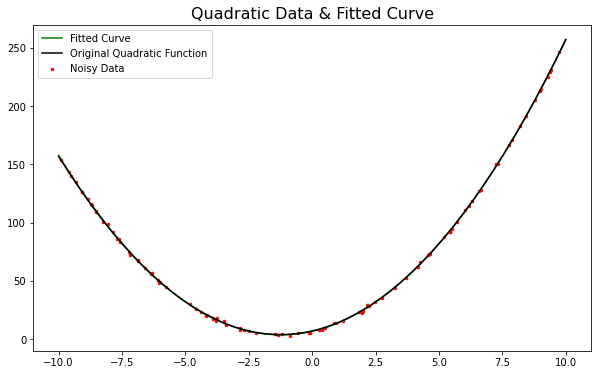

In [571]:
plt.figure(figsize=(10,6))
plt.title('Quadratic Data & Fitted Curve', fontsize=16)
x = np.linspace(-10, 10, 50)
plt.scatter(X, y, s=6, color = 'red', label = 'Noisy Data')
plt.plot(x, a*x**2 + b*x + c, color='green', label = 'Fitted Curve')
plt.plot(x, 2*x**2 + 5*x + 7, color = 'black', label = 'Original Quadratic Function')
plt.legend()
plt.show()